# MonkeyPox Data Analysis

## Importing libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Getting data

In [20]:
dataset0 = pd.read_csv("Daily_Country_Wise_Confirmed_Cases.csv").rename(columns={'Country':'Date'}).set_index('Date')
dataset0.head(5)

,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,2022-05-08,...,2022-08-03,2022-08-04,2022-08-05,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12
Date,,,,,,,,,,,,,,,,,,,,,
Nigeria,3,0,1,0,6,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
Cameroon,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Central African Republic,0,0,0,2,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Republic of Congo,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
England,0,0,0,0,0,0,0,0,1,0,...,0,92,0,0,0,153,0,0,0,0


## Data exploration

In [21]:
dataset1 = dataset0.transpose()
#dataset1.describe()
dataset1.head(5)

Date,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,France,...,Uruguay,Sudan,Saint Martin (French part),Bolivia,Montenegro,Cyprus,Lithuania,Guatemala,Moldova,Greenland
2022-01-31,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-04,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-31,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset1.describe()

Date,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,France,...,Uruguay,Sudan,Saint Martin (French part),Bolivia,Montenegro,Cyprus,Lithuania,Guatemala,Moldova,Greenland
count,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,...,100.000000,100.00,100.00,100.000000,100.00,100.000000,100.000000,100.000000,100.00,100.00
mean,1.570000,0.0700,0.080000,0.030000,28.830000,1.630000,7.700000,57.190000,111.30000,26.590000,...,0.020000,0.01,0.01,0.110000,0.01,0.030000,0.050000,0.030000,0.01,0.02
std,4.649872,0.4324,0.485757,0.222702,61.767576,11.182287,14.876936,148.760447,231.64081,74.615796,...,0.140705,0.10,0.10,0.510397,0.10,0.222702,0.297294,0.171447,0.10,0.20
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00
25%,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00
50%,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.00000,0.000000,...,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00
75%,0.000000,0.0000,0.000000,0.000000,14.250000,0.000000,11.000000,17.500000,100.25000,1.250000,...,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00
max,24.000000,3.0000,4.000000,2.000000,275.000000,97.000000,77.000000,776.000000,1410.00000,525.000000,...,1.000000,1.00,1.00,4.000000,1.00,2.000000,2.000000,1.000000,1.00,2.00


### Total cases by country

In [5]:
toGraph = pd.DataFrame()
toGraph['Country'] = dataset1.sum().index
toGraph['Cases'] = dataset1.sum().values
toGraph

,Country,Cases
0,Nigeria,157
1,Cameroon,7
2,Central African Republic,8
3,Republic of Congo,3
4,England,2883
...,...,...
88,Cyprus,3
89,Lithuania,5
90,Guatemala,3
91,Moldova,1


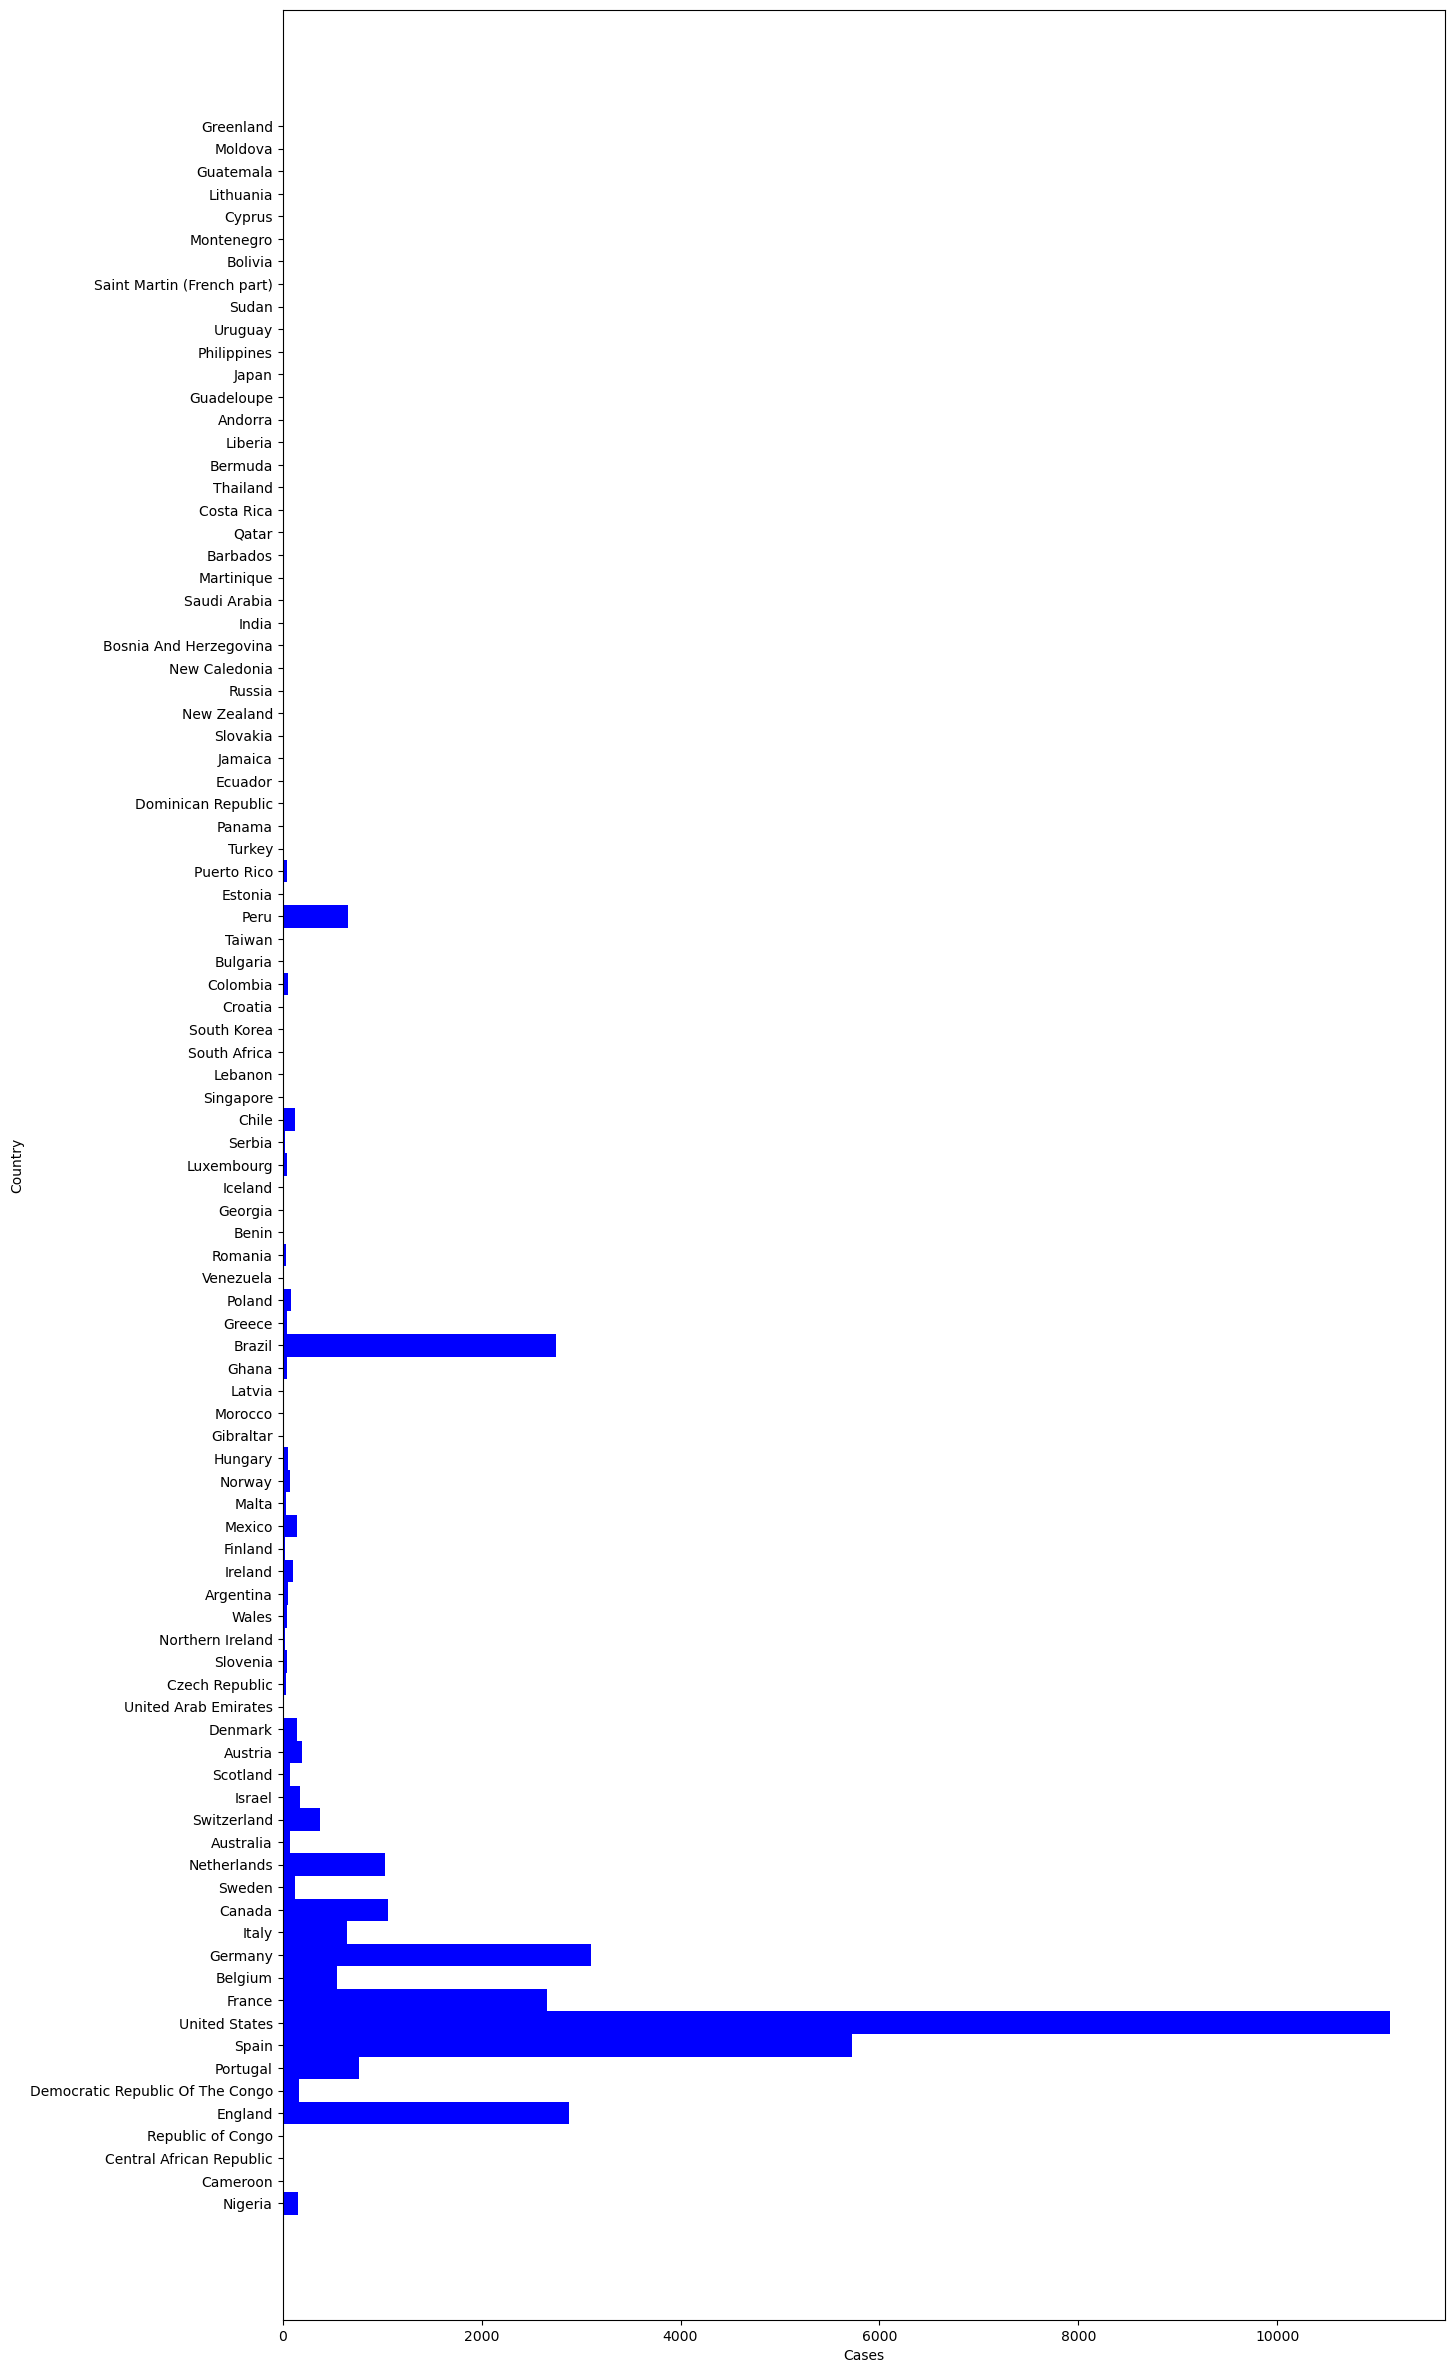

In [6]:
plt.figure(figsize=(15, 30))
plt.barh(toGraph['Country'], toGraph['Cases'], color='blue', height=1)
plt.xlabel('Cases')
plt.ylabel('Country')
plt.show()

#### Top 5 countries with the most cases

In [7]:
toGraph.sort_values(by='Cases', ascending=False)[:5]

,Country,Cases
8,United States,11130
7,Spain,5719
11,Germany,3102
4,England,2883
38,Brazil,2747


#### Mean of cases by country

In [8]:
dataset1.mean()

Date
Nigeria                      1.57
Cameroon                     0.07
Central African Republic     0.08
Republic of Congo            0.03
England                     28.83
                            ...  
Cyprus                       0.03
Lithuania                    0.05
Guatemala                    0.03
Moldova                      0.01
Greenland                    0.02
Length: 93, dtype: float64

### Case graphs by country

#### Cumulative frequency

<function matplotlib.pyplot.show(close=None, block=None)>

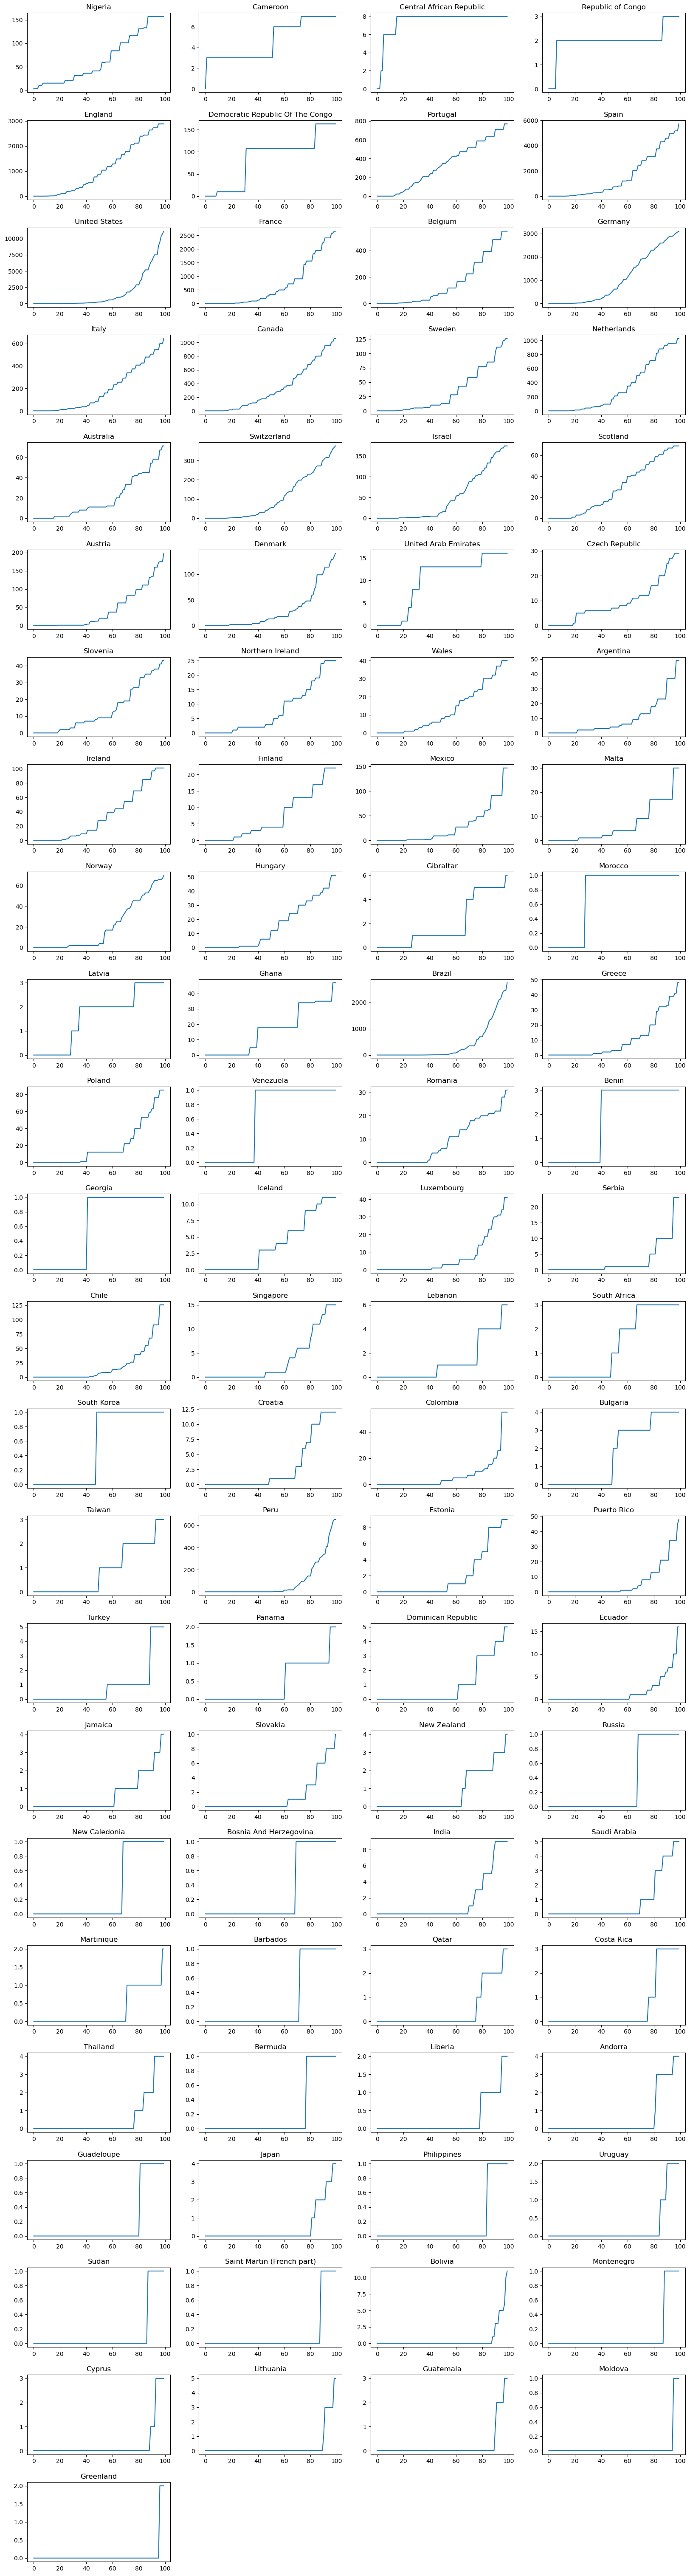

In [9]:
plt.figure(figsize=(20,75))
for j in range(0, len(dataset1.columns.values)):
    temp = 0
    X = []
    Y = []
    for i in range(0, len(dataset1.iloc[:,j])):
        Y.append(i)
        X.append(temp + dataset1.iloc[:,j][i])
        temp = X[i]
    plt.subplot(24,4,j+1)
    plt.plot(Y,X)
    plt.title(dataset1.columns.values[j])

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show

#### Absolute frequency

<function matplotlib.pyplot.show(close=None, block=None)>

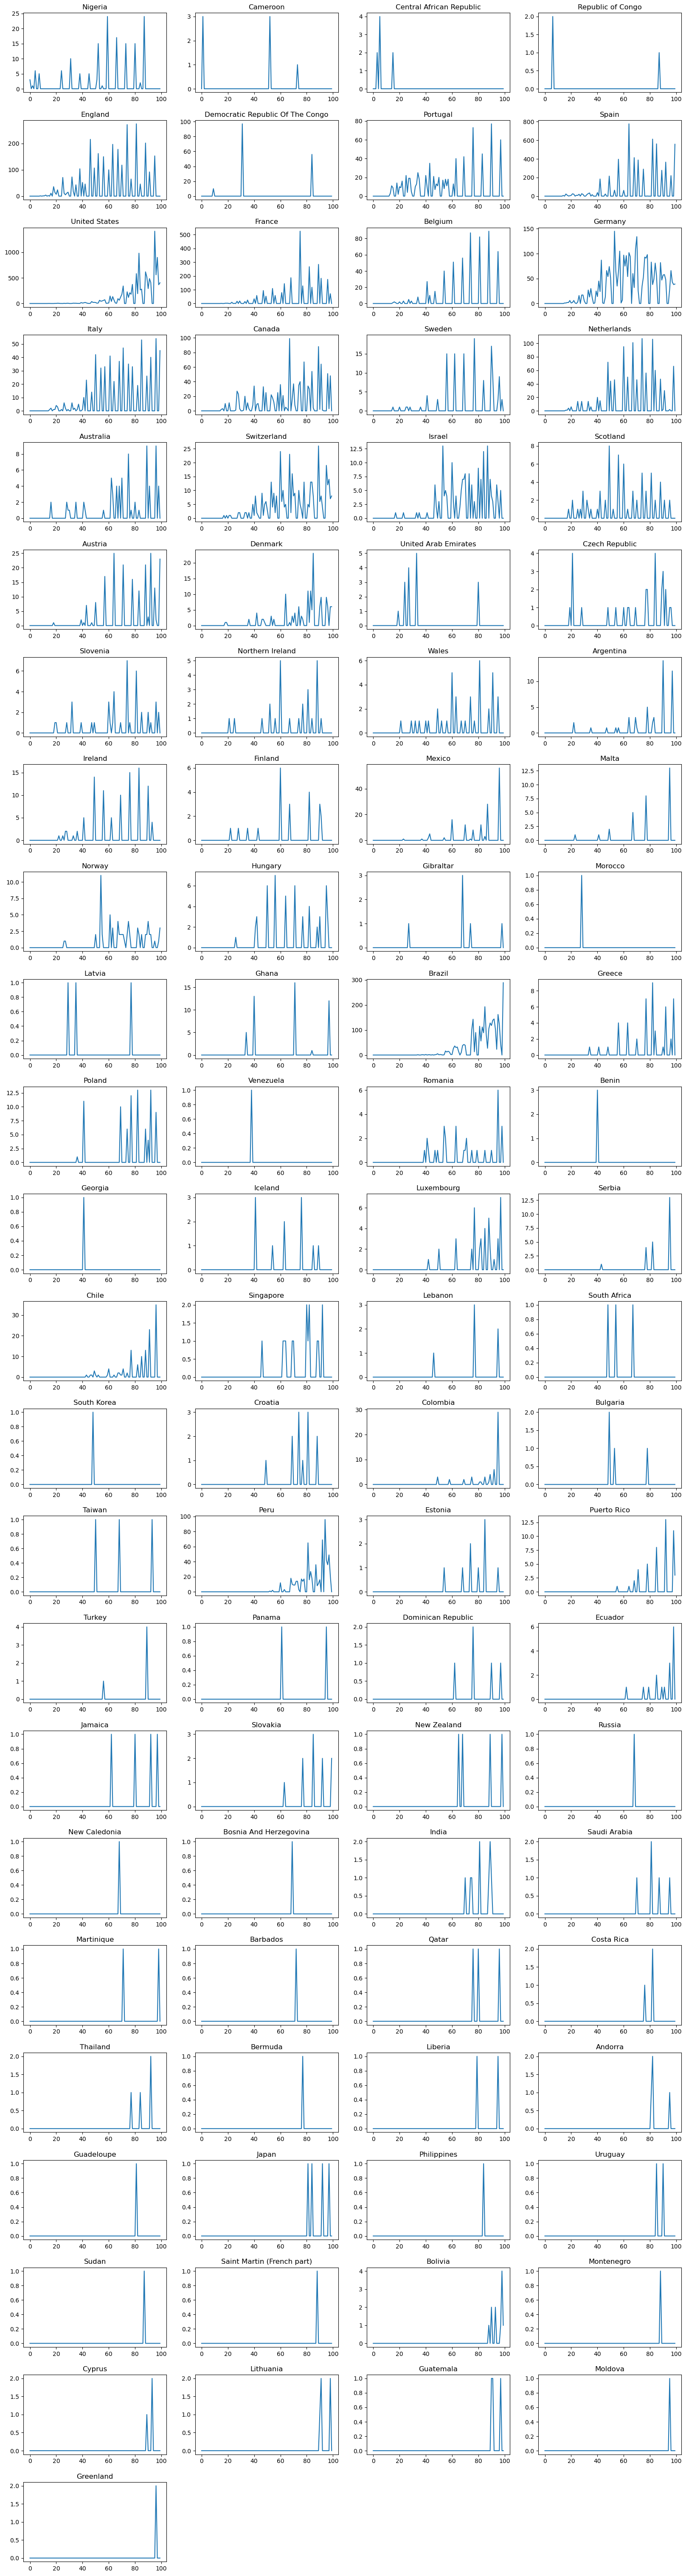

In [10]:
plt.figure(figsize=(20,75))
for j in range(0, len(dataset1.columns.values)):
    X = []
    Y = []
    for i in range(0, len(dataset1.iloc[:,j])):
        Y.append(i)
        X.append(dataset1.iloc[:,j][i])
    plt.subplot(24,4,j+1)
    plt.plot(Y,X)
    plt.title(dataset1.columns.values[j])

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show

### Global cases graph

<function matplotlib.pyplot.show(close=None, block=None)>

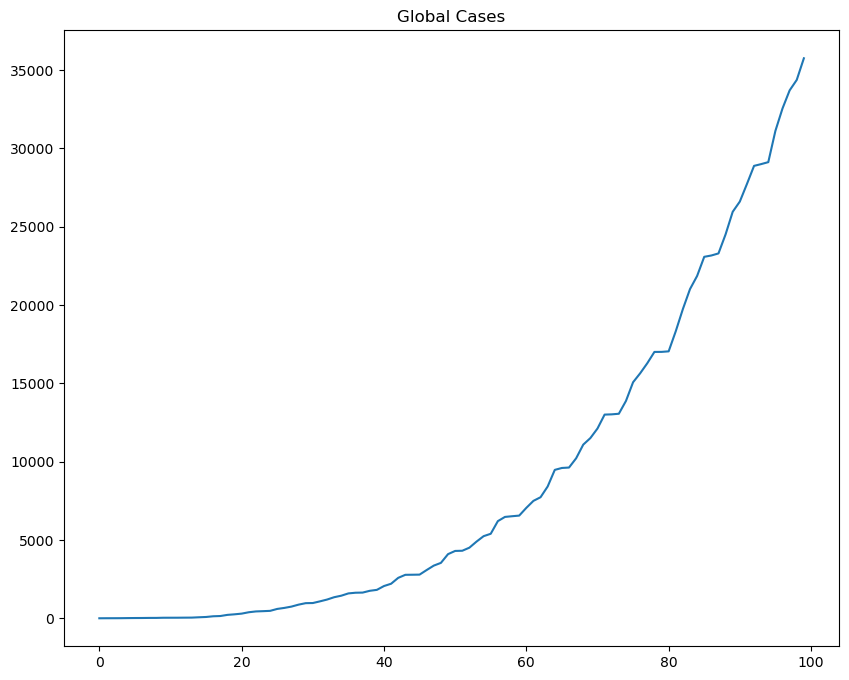

In [11]:
plt.figure(figsize=(10,8))

temp = 0
X = []
Y = []
for i in range(0, len(dataset1.iloc[:,0])):
    for j in range(0, len(dataset1.columns.values)):
        temp = temp + dataset1.iloc[:,j][i]
    Y.append(i)
    X.append(temp)

plt.plot(Y,X)
plt.title("Global Cases")

plt.show